In [9]:
import pandas as pd
import re

In [2]:
expert_ranking = pd.read_csv('data/shared-dataset-v2/corona_warn_app_analyse_points.csv')
expert_ranking.loc[:, ['id', 'total_points']]

,id,total_points
0,9eb2,0
1,3669,20
2,6f62,8
3,066e,13
4,6b4e,14
5,1953,20
6,7cc7,20
7,88a6,19
8,23a6,15
9,fe28,20


In [3]:
expert_ranking.sort_values(by='total_points', ascending=False)

,id,total_points,rank,points_subtask_2,points_subtask_3,points_subtask_4,points_subtask_5
1,3669,20,1,4,6,5,5
5,1953,20,1,4,6,5,5
6,7cc7,20,1,4,6,5,5
16,63e1,20,1,4,6,5,5
27,d28c,20,1,4,6,5,5
9,fe28,20,1,4,6,5,5
13,2281,20,1,4,6,5,5
25,eac9,20,1,4,6,5,5
19,4c41,20,1,4,6,5,5
20,c926,19,10,4,6,4,5


In [27]:
comparisons = []
files = [
    '007.2_llama3.3_azure.log', '008.2_deepseek_azure.log', '009.2_markdown.log', '010.2_markdown_with_tags.log', '011.2_reorder1.log', '011.2_reorder2.log', '011.2_reorder3.log', '011.2_reorder4.log', 'unknown_randomization/001.2_llama3.3_azure.1.log', 'unknown_randomization/001.2_llama3.3_azure.2.log', 'unknown_randomization/001.2_llama3.3_azure.3.log', 'unknown_randomization/001.2_llama3.3_azure.log', 'unknown_randomization/002.2_deepseek_azure.log', 'unknown_randomization/004.2_azure_corona_warn_app.log', 'unknown_randomization/005.2_markdown_with_tags.log', 'unknown_randomization/006.2_majority_vote.log'
]

for file in files:
    with open(f'experiments/logs/{file}', 'r') as f:
        comparisons.extend([f.strip()[-11:] for f in f.readlines() if re.match(r'.*[a-f0-9]{4} [<>] [a-f0-9]{4}$', f)])

print(len(comparisons))

3167


In [36]:
def check_comparison(c: str) -> bool:
    a, cmp, b = c.split(' ')
    if cmp == '<':
        return expert_ranking.loc[expert_ranking['id'] == a, 'total_points'].values[0] <= expert_ranking.loc[expert_ranking['id'] == b, 'total_points'].values[0]
    else:
        return expert_ranking.loc[expert_ranking['id'] == a, 'total_points'].values[0] >= expert_ranking.loc[expert_ranking['id'] == b, 'total_points'].values[0]

def comparision_points_diff(c: str) -> int:
    a, cmp, b = c.split(' ')
    return expert_ranking.loc[expert_ranking['id'] == a, 'total_points'].values[0] - expert_ranking.loc[expert_ranking['id'] == b, 'total_points'].values[0]

problematic_notebooks: dict = {}
point_diffs: dict = {}

for c in comparisons:
    if check_comparison(c):
        print('Correct', end='')
        pass
    else:
        print('Wrong  ', end='')
        a, cmp, b = c.split(' ')
        problematic_notebooks[a] = problematic_notebooks.get(a, 0) + 1
        problematic_notebooks[b] = problematic_notebooks.get(b, 0) + 1

        point_diffs[a] = point_diffs.get(a, 0) - comparision_points_diff(c)
        point_diffs[b] = point_diffs.get(b, 0) + comparision_points_diff(c)

    print(f' {c} by {comparision_points_diff(c)}')

Correct 146f < fe28 by -20
Correct fe28 > c926 by 1
Wrong   8d45 < 8eaf by 2
Correct 8eaf < 88a6 by -12
Wrong   6f62 > 6b4e by -6
Correct 6f62 < b14b by -10
Wrong   23a6 > d28c by -5
Correct 23a6 > 21de by 8
Correct b56b > 6c5b by 4
Wrong   b56b > 4c2a by -3
Correct 1953 < 2281 by 0
Correct 2281 > 066e by 7
Correct c938 > 8ac3 by 15
Wrong   c938 > 3669 by -1
Correct 9eb2 < eac9 by -20
Correct eac9 > 4c41 by 0
Wrong   cb76 > ad47 by -2
Wrong   cb76 > 63e1 by -7
Wrong   88a6 > fe28 by -1
Wrong   8d45 < 8eaf by 2
Correct 8eaf > 8c43 by 1
Wrong   23a6 > b14b by -3
Correct 21de < d28c by -13
Correct d28c > baa4 by 3
Correct 2281 > b56b by 14
Correct 1953 > 066e by 7
Correct 1953 > abd2 by 11
Correct eac9 > c938 by 1
Correct 9eb2 < 4c41 by -20
Correct 4c41 > 44bd by 1
Correct 88a6 > cb76 by 6
Wrong   8eaf > fe28 by -13
Wrong   8d45 < 8c43 by 3
Correct 8c43 < 7cc7 by -14
Correct 8eaf < 7cc7 by -13
Wrong   88a6 > 7cc7 by -1
Correct 2281 > 23a6 by 5
Correct 1953 > b56b by 14
Correct abd2 < 066e

In [32]:
for l in sorted(problematic_notebooks, key=lambda x: problematic_notebooks[x], reverse=True):
    print(f'{l}: {problematic_notebooks[l]}')

8d45: 83
6f62: 75
4ca2: 73
6b4e: 71
abd2: 71
8eaf: 68
21de: 65
baa4: 64
8c43: 62
1953: 57
a044: 57
b56b: 56
066e: 56
8ac3: 53
cb76: 51
b14b: 50
23a6: 48
4c2a: 45
c938: 44
63e1: 42
c926: 41
6c5b: 40
88a6: 39
44bd: 39
fe28: 35
ad47: 33
3669: 31
fb4b: 23
4c41: 20
d28c: 18
146f: 17
eac9: 11
2281: 10
9eb2: 9
7cc7: 7


In [38]:
# ↑ Zahl heißt das Notebook wird häufiger besser bewertet, als es eigentlich ist
# ↓ Zahl heißt das Notebook wird häufiger schlechter bewertet, als es eigentlich ist
print(f'Notb:   Score   Wrg.Comparisons   Total Points')
for l in sorted(point_diffs, key=lambda x: point_diffs[x], reverse=True):
    print(f'{l}:   {point_diffs[l]:5d}   {problematic_notebooks[l]:15d}   {expert_ranking.loc[expert_ranking["id"] == l, "total_points"].values[0]:10d}')

Notb:   Score   Wrg.Comparisons   Total Points
8eaf:     558                68            7
8ac3:     290                53            4
a044:     231                57            6
8c43:     216                62            6
23a6:     198                48           15
b56b:     192                56            6
cb76:     185                51           13
6f62:     177                75            8
21de:     115                65            7
fb4b:      91                23            0
baa4:      90                64           17
9eb2:      70                 9            0
b14b:      48                50           18
146f:      34                17            0
7cc7:     -16                 7           20
ad47:     -20                33           15
88a6:     -23                39           19
c926:     -29                41           19
2281:     -40                10           20
eac9:     -46                11           20
4c2a:     -48                45            9
d28c:   

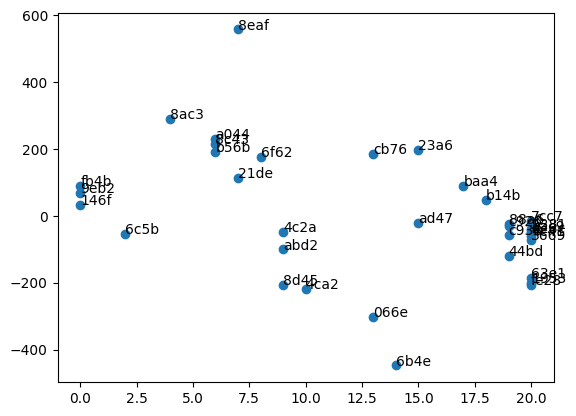

In [40]:
# plot score vs. total points
import matplotlib.pyplot as plt
import numpy as np

#x = [point_diffs[l] for l in point_diffs]
#y = [problematic_notebooks[l] for l in point_diffs]

x = [expert_ranking.loc[expert_ranking["id"] == l, "total_points"].values[0] for l in point_diffs]
y = [point_diffs[l] for l in point_diffs]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(point_diffs):
    ax.annotate(txt, (x[i], y[i]))

plt.show()